In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf 
from tensorflow import keras
from sklearn.metrics import precision_recall_fscore_support as score
from keras.utils import np_utils
from sklearn.utils import shuffle

Using TensorFlow backend.


In [3]:
train = pd.read_csv('0505final_train.csv')

In [4]:
train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)
train = shuffle(train)

In [5]:
train_feature = train.columns[1:]
train_target = train.columns[0]
train_feature = train[train_feature]
train_y = train[train_target]
train_y = train_y.values
train_y = np_utils.to_categorical(train_y, num_classes = 4)

In [6]:
new_all_feature = preprocessing.scale(train_feature)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [8]:
model = tf.keras.models.Sequential()

In [9]:
model.add( tf.keras.layers.Dense(units=128, input_shape=[52],            #52,47
           kernel_initializer='he_normal',
           kernel_regularizer= regularizers.l2(0.1),  #0.04   #0.04   #1層  0.02
#           bias_regularizer = regularizers.l2(0.05),  #0.05
#           activity_regularizer=regularizers.l2(0.0001),                      
           activation='relu') )

In [10]:
model.add(tf.keras.layers.Dropout(0.4))  #ep 300

In [11]:
model.add(tf.keras.layers.Dense(units=64,
               kernel_initializer='he_normal',  #he_normal
               kernel_regularizer= regularizers.l2(0.1),   #0.06
#               bias_regularizer = regularizers.l2(0.05),                
#               activity_regularizer=regularizers.l2(0.001),
               activation='relu'))   #relu

In [12]:
model.add(tf.keras.layers.Dropout(0.4))  #ep 100    #0.5  #0.3

In [13]:
model.add(tf.keras.layers.Dense(units=4, 
#                                kernel_initializer='normal',
                                activation='softmax'))    # kernel_initializer='normal',

In [14]:
adam = keras.optimizers.Adam( lr=0.001 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08 )

In [15]:
model.compile( optimizer = adam , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [16]:
train_history = model.fit(new_all_feature , train_y, validation_split = 0.1,
                          epochs = 50, batch_size = 15, verbose=2)   #一層500  三層1500

Train on 171 samples, validate on 20 samples
Epoch 1/50
 - 0s - loss: 30.6925 - acc: 0.2047 - val_loss: 28.1742 - val_acc: 0.2500
Epoch 2/50
 - 0s - loss: 27.3531 - acc: 0.3099 - val_loss: 25.5584 - val_acc: 0.4500
Epoch 3/50
 - 0s - loss: 24.8633 - acc: 0.3684 - val_loss: 23.2640 - val_acc: 0.5000
Epoch 4/50
 - 0s - loss: 22.5313 - acc: 0.4620 - val_loss: 21.1370 - val_acc: 0.5500
Epoch 5/50
 - 0s - loss: 20.4511 - acc: 0.4327 - val_loss: 19.1713 - val_acc: 0.6000
Epoch 6/50
 - 0s - loss: 18.4812 - acc: 0.5380 - val_loss: 17.3791 - val_acc: 0.6000
Epoch 7/50
 - 0s - loss: 16.7539 - acc: 0.4737 - val_loss: 15.7365 - val_acc: 0.6000
Epoch 8/50
 - 0s - loss: 15.1742 - acc: 0.4737 - val_loss: 14.2462 - val_acc: 0.6000
Epoch 9/50
 - 0s - loss: 13.7478 - acc: 0.5263 - val_loss: 12.8879 - val_acc: 0.6500
Epoch 10/50
 - 0s - loss: 12.4303 - acc: 0.5322 - val_loss: 11.6634 - val_acc: 0.6000
Epoch 11/50
 - 0s - loss: 11.2033 - acc: 0.5731 - val_loss: 10.5637 - val_acc: 0.6000
Epoch 12/50
 - 0s 

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

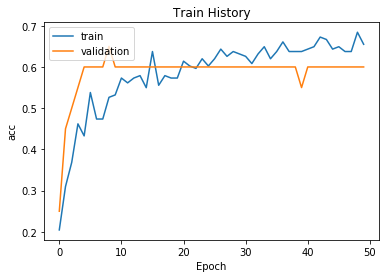

In [18]:
show_train_history(train_history,'acc','val_acc')

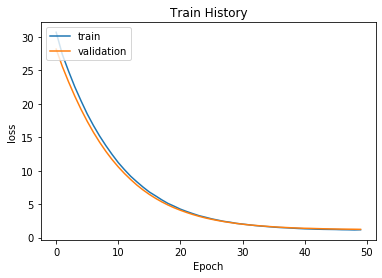

In [19]:
show_train_history(train_history,'loss','val_loss')

In [29]:
from keras.models import load_model
model.save('model0505_V.h5')

In [ ]:
import tensorflowjs as tfjs

In [34]:
#tfjs.converters.save_keras_model(model,'./model_file')